In [1]:
# Install required packages
!pip install gradio_client Pillow requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 6.1 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
from gradio_client import Client, handle_file
import requests
from PIL import Image
from IPython.display import display, Image as IPImage
import io
import base64
from google.colab import userdata

In [3]:
# Initialize the client
client = Client("deepseek-ai/Janus-Pro-7B", hf_token = userdata.get('HF_TOKEN'))

Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔


In [4]:
# Function to load image from local path
def load_image_from_path(image_path):
    return Image.open(image_path)

In [5]:
# Function for image understanding
def ask_about_image(image_path, question):
    client = Client("deepseek-ai/Janus-Pro-7B")
    result = client.predict(
        handle_file(image_path),  # Use handle_file for proper file processing
        question,
        api_name="/multimodal_understanding"
    )
    return result

In [6]:
# Function for text-to-image generation
def generate_image(prompt):
    try:
        # Generate images
        result = client.predict(
            prompt,     # String prompt
            api_name="/generate_image"
        )

        # The result is a list of dictionaries containing image paths
        if isinstance(result, list):
            for item in result:
                if isinstance(item, dict) and 'image' in item:
                    # Download and display each image
                    image_path = item['image']
                    try:
                        img = Image.open(image_path)
                        display(img)
                    except Exception as e:
                        print(f"Could not open image: {str(e)}")
        return "Image generation complete"
    except Exception as e:
        return f"Error: {str(e)}"

In [8]:
from google.colab import files
print("Please upload an image file:")
uploaded = files.upload()

Please upload an image file:


Saving image.webp to image.webp


In [9]:
filename = list(uploaded.keys())[0]
image_from_upload = load_image_from_path(filename)
question = "Describe this image in detail"
print("\nImage Understanding from uploaded file:")
response = ask_about_image(filename, question)
print(f"Question: {question}")
print(f"Answer: {response}\n")


Image Understanding from uploaded file:
Loaded as API: https://deepseek-ai-janus-pro-7b.hf.space ✔
Question: Describe this image in detail
Answer: This image depicts a fantastical, magical landscape at dusk or dawn. The central focus is a large, ancient tree with sprawling branches that extend outward, adorned with glowing, colorful lights. The tree's trunk is thick and gnarled, suggesting it has been there for many years.

Surrounding the tree is a vibrant, enchanted forest. The ground is covered with lush, colorful foliage, including ferns, flowers, and other plants that emit a soft, glowing light. The colors are predominantly purples, pinks, and greens, creating a dreamy and ethereal atmosphere.

A winding stream flows from the foreground towards the background, reflecting the colorful lights of the tree and the surrounding flora. The stream appears to be crystal clear, adding to the magical quality of the scene.

In the background, the landscape gently slopes upward, leading to a 

In [10]:
prompt = "Imagine a surreal, dreamlike forest bathed in the soft glow of twilight. In the center of the scene stands an ancient, twisting tree whose bark shimmers with iridescent hues of blue, purple, and silver. The tree's sprawling branches stretch outward like the delicate fingers of a painter, scattering flecks of light like stardust across the darkening sky.Beneath the tree, a narrow, winding stream of liquid silver reflects the enchanting colors of the sky. Along its banks, luminescent wildflowers bloom in riotous bursts of color—crimson, emerald, and gold—each petal edged in a faint, otherworldly glow.In the background, rolling hills fade into a misty horizon where the last vestiges of a deep violet sunset merge with the emerging night. Ethereal creatures—half-hidden among the ferns and softly illuminated by fireflies—glide gracefully, adding an element of mystery and magic to the scene.Above it all, a full, radiant moon hangs low in the sky, its light weaving intricate patterns through the treetops and lending an air of gentle solemnity to the enchanted grove. Wisps of silvery fog drift across the forest floor, blurring the line between reality and the realm of dreams.This artwork blends elements of fantasy and impressionism, inviting the viewer to explore a world where nature, magic, and the soft murmur of twilight converge into a harmonious, poetic tableau."
print("Text-to-Image Generation:")
print(f"Prompt: {prompt}")
result = generate_image(prompt)

Output hidden; open in https://colab.research.google.com to view.

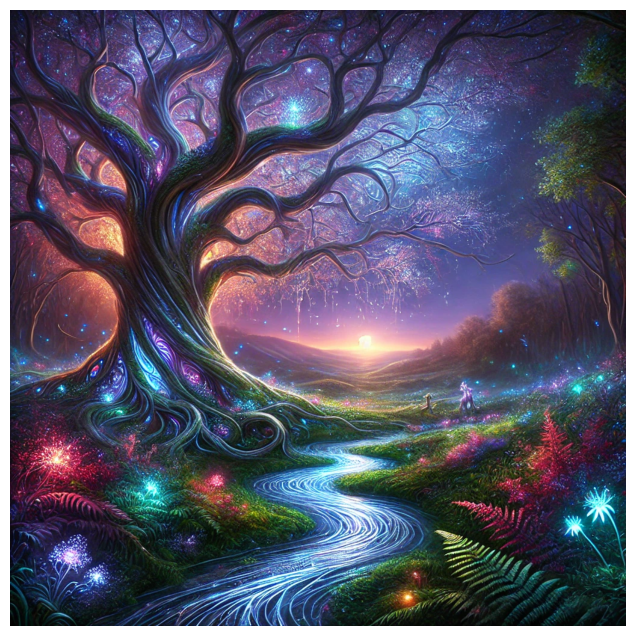

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = '/content/image.webp'  # Replace with your image path if needed
img = mpimg.imread(image_path)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axis for better aesthetics
plt.show()

#The below image is generated by chatGPT using the same prompt